In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

 thin fgsm
cat -> ['cat', 'cat', 'bird']


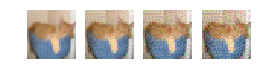

thin opt
deer -> ['airplane', 'airplane', 'airplane']


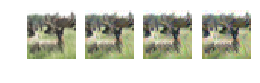

wide fgsm
automobile -> ['airplane', 'airplane', 'bird']


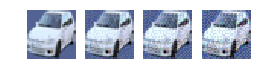

wide opt
frog -> ['automobile', 'automobile', 'automobile']


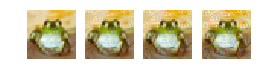

tutorial fgsm
frog -> ['bird', 'bird', 'bird']


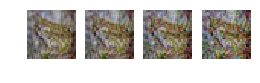

tutorial opt
horse -> ['cat', 'cat', 'cat']


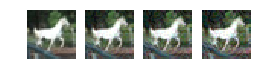

In [8]:
attacks = ['fgsm', 'opt']
models = ['thin', 'wide', 'tutorial']
epsilons = ['8', '12', '16']
opt_offset = 6705
gs = matplotlib.gridspec.GridSpec(1, len(epsilons) + 1)

orig_imgs = np.load('test_orig.npy')
gt = np.argmax(np.load('test_labels.npy'), axis=1)

for m in models:
    preds_orig = np.load('preds_orig_%s.npy' % m)
    for a in attacks:
        print m, a
        imgs = np.asarray([np.load('test_%s_%s_%s.npy' % (m, a, e)) for e in epsilons])
        preds_adv = np.asarray([np.load('preds_%s_%s_%s_%s.npy' % (m, a, e, m)) for e in epsilons])
        if a == 'opt':
            batch = slice(opt_offset, opt_offset + imgs.shape[1])
            orig_imgs_slice = orig_imgs[batch]
            gt_slice = gt[batch]
            preds_orig_slice = preds_orig[batch]
        else:
            orig_imgs_slice = orig_imgs
            gt_slice = gt
            preds_orig_slice = preds_orig
        success = np.not_equal(preds_adv, preds_orig_slice[None, :])
        success_any = np.any(success, axis=0)
        success_any_indices, = np.where(success_any)
        index = np.random.choice(success_any_indices)

        print names[preds_orig_slice[index]], '->', [names[pred] for pred in preds_adv[:, index]]
        plt.figure(figsize=(len(epsilons) + 1, 1))
        plt.subplot(gs[0, 0])
        plt.imshow(orig_imgs_slice[index] / 255)
        plt.axis('off')
        for i, e in enumerate(imgs[:, index]):
            plt.subplot(gs[0, i + 1])
            plt.imshow(imgs[i, index] / 255)
            plt.axis('off')
        plt.show()

max 16.0


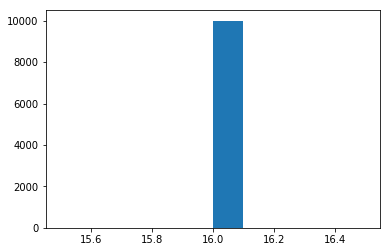

In [11]:
adv = np.load('test_thin_fgsm_16.npy')
# offset = 6705
# count = len(adv)
# orig_slice = np.load('test_orig.npy')[offset:offset+count]
orig_slice = np.load('test_orig.npy')
li = np.amax(np.abs(adv - orig_slice), axis=(1, 2, 3))
print 'max', np.max(li)
plt.hist(li)
plt.show()

(10000, 32, 32, 3) float32 0.0 255.0


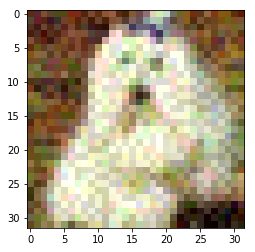

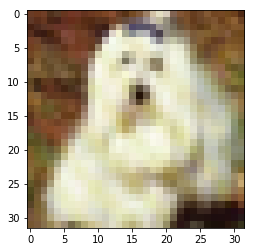

In [20]:
print adv.shape, adv.dtype, np.min(adv), np.max(adv)
index = 6711
plt.imshow(adv[index] / 255)
plt.show()
plt.imshow(orig_slice[index] / 255)
plt.show()